## Explore peak data

Separate by TF/histone (could even separate further into narrow/broad histones but not sure) and count number of peaks, plot distribution. Also take out phantom peaks and see how number of peaks is affected. 
Flag datasets with less than 100(?) peaks and look into further. 

In [1]:
import pandas as pd
import seaborn as sb
import glob
import os
import pybedtools
from pybedtools.featurefuncs import gff2bed

In [2]:
throw_out = ['ERX242704', 'ERX242706', 'ERX242707','ERX242709', 'ERX242710','ERX242711','ERX242712','ERX242713',
             'ERX242715', 'ERX242716', 'ERX242717', 'ERX242718','ERX242722', 'ERX242723', 'ERX242724', 'ERX242726',
             'ERX242727', 'ERX242728', 'ERX242729']

In [3]:
#look into these
empty = ['SRX495277','SRX495278','SRX495290','SRX495289','SRX326969']

In [4]:
#all peaks would be glob.glob('../chipseq-wf/data/chipseq_peaks/*/[S,E]RX*/peaks.bed')
#macs2 peaks
concat = []
for fname in glob.glob('../chipseq-wf/data/chipseq_peaks/macs2/[S,E]RX*/peaks.bed'):
    name = fname.split('../chipseq-wf/data/chipseq_peaks/macs2/')[1].split('/peaks.bed')[0]
    if name not in throw_out:
        if name not in empty:
            df = pd.read_table(fname, header=None)
            df['srx'] = name
            df['caller'] = 'macs2'
            concat.append(df)
macs2 = pd.concat(concat)

In [5]:
macs2.head()

,0,1,2,3,4,5,6,7,8,srx,caller,9
0,chr2L,16617,16893,SRX191913_peak_1,334,.,6.04012,35.59567,33.40816,SRX191913,macs2,NaN
1,chr2L,18490,19713,SRX191913_peak_2,178,.,4.30215,19.78752,17.81555,SRX191913,macs2,NaN
2,chr2L,21242,21484,SRX191913_peak_3,79,.,3.16530,9.77751,7.92056,SRX191913,macs2,NaN
3,chr2L,34118,34304,SRX191913_peak_4,42,.,2.17206,5.98254,4.27362,SRX191913,macs2,NaN
4,chr2L,35499,35830,SRX191913_peak_5,396,.,5.50646,41.82674,39.60189,SRX191913,macs2,NaN


spp_empty = [
SRX149192
SRX885700
ERX402137
ERX402138
SRX885698
SRX883604
SRX1179573
SRX054533
SRX495789
SRX1389384
SRX2055961
SRX2055966
SRX2055958
ERX402108
SRX330269
ERX402133
SRX306190
ERX402112
SRX359797
SRX1433400
SRX306193
ERX1403350
SRX1179572
SRX1433401
SRX018632
SRX1389387
SRX326970
SRX2055964
SRX885702
SRX2055945
SRX326969
SRX447393
SRX330270
SRX495270
SRX2055944
SRX097620
SRX359798
SRX883605
SRX018631
SRX306196
SRX018629
SRX2055953
SRX149189
SRX1389388
SRX018630
SRX1433397
ERX402114
SRX495269
SRX1433399
]

In [6]:
#spp peaks
glob.glob('../chipseq-wf/data/chipseq_peaks/spp/[S,E]RX*/peaks.bed')
concat = []
for fname in glob.glob('../chipseq-wf/data/chipseq_peaks/spp/[S,E]RX*/peaks.bed'):
    name = fname.split('../chipseq-wf/data/chipseq_peaks/spp/')[1].split('/peaks.bed')[0]
    if name not in throw_out:
        if os.path.getsize(fname) != 0:
            df = pd.read_table(fname, header=None)
            df['srx'] = name
            df['caller'] = 'spp'
            concat.append(df)
spp = pd.concat(concat)

In [7]:
spp[[1,2]]= spp[[1,2]].astype(int)
spp.head()

,0,1,2,3,4,5,6,7,8,9,srx,caller
0,chr3L,16052060,16052396,.,0,.,83.161841,-1,3.062582,189,SRX017462,spp
1,chr2R,15847978,15848246,.,0,.,68.046814,-1,3.062582,134,SRX017462,spp
2,chrUn_DS484314v1,1987,2483,.,0,.,65.108303,-1,3.062582,127,SRX017462,spp
3,chr2L,3046627,3047229,.,0,.,63.254780,-1,3.062582,218,SRX017462,spp
4,chrUn_CP007120v1,70331,70564,.,0,.,59.952580,-1,3.062582,127,SRX017462,spp


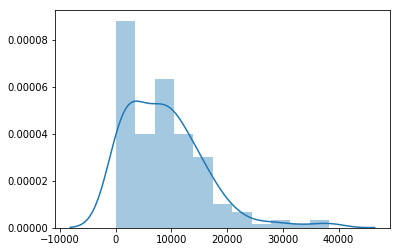

In [8]:
#Count number of peaks per dataset macs2 

peakcount_macs = macs2.groupby('srx')[[1]].count()
sb.distplot(peakcount_macs)

In [9]:
peakcount_macs.describe()

,1
count,173.000000
mean,8753.236994
std,7222.068513
min,28.000000
25%,3093.000000
50%,8306.000000
75%,12812.000000
max,38297.000000


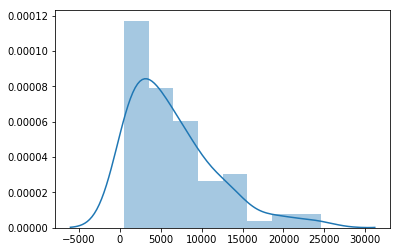

In [10]:
#Count number of peaks per dataset spp
peakcount_spp = spp.groupby('srx')[[1]].count()
sb.distplot(peakcount_spp)

In [11]:
peakcount_spp.describe()

,1
count,88.000000
mean,6371.431818
std,5298.118269
min,534.000000
25%,2056.000000
50%,5088.500000
75%,8904.750000
max,24583.000000


In [12]:
both = pd.concat([macs2, spp])
both.head()

,0,1,2,3,4,5,6,7,8,srx,caller,9
0,chr2L,16617,16893,SRX191913_peak_1,334,.,6.04012,35.59567,33.40816,SRX191913,macs2,NaN
1,chr2L,18490,19713,SRX191913_peak_2,178,.,4.30215,19.78752,17.81555,SRX191913,macs2,NaN
2,chr2L,21242,21484,SRX191913_peak_3,79,.,3.16530,9.77751,7.92056,SRX191913,macs2,NaN
3,chr2L,34118,34304,SRX191913_peak_4,42,.,2.17206,5.98254,4.27362,SRX191913,macs2,NaN
4,chr2L,35499,35830,SRX191913_peak_5,396,.,5.50646,41.82674,39.60189,SRX191913,macs2,NaN


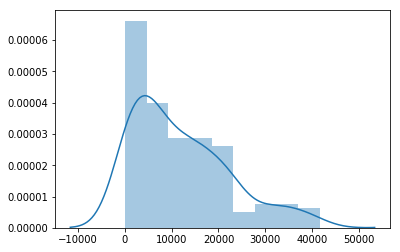

In [13]:
#Count number of peaks per dataset both
peakcount = both.groupby('srx')[[1]].count()
sb.distplot(peakcount)

In [14]:
peakcount.describe()

,1
count,173.000000
mean,11994.196532
std,10328.661299
min,28.000000
25%,3413.000000
50%,9651.000000
75%,17527.000000
max,41672.000000


### Remove phantom peaks

In [15]:
phantompeaks = pd.read_excel(
    '../output/chip/gkv637_Supplementary_Data/Supplementary_table_3__List_of_Phantom_Peaks.xlsx')

In [16]:
phantompeaks = phantompeaks[['chr ','start','end','Name']]

In [17]:
bed = both[[0,1,2,'srx']]

In [18]:
bed = bed[~bed[1].astype(str).str.contains('-')]

In [19]:
intersect = pybedtools.BedTool.from_dataframe(bed).intersect(pybedtools.BedTool.from_dataframe(phantompeaks), 
                                                             wo=True).to_dataframe()

In [20]:
intersect.shape

(130331, 9)

In [21]:
#filter for an overlap of at least 50bp based on Jain et al 2014
filtered = intersect[intersect.itemRgb >= 50]

In [22]:
filtered.shape

(125279, 9)

In [23]:
filtered.head()

,chrom,start,end,name,score,strand,thickStart,thickEnd,itemRgb
0,chr2L,18490,19713,SRX191913,chr2L,18637,19089,Phantom Peak-1,452
1,chr2L,102214,102424,SRX191913,chr2L,102118,102570,Phantom Peak-2,210
2,chr2L,107113,109566,SRX191913,chr2L,107669,108121,Phantom Peak-3,452
3,chr2L,158896,159714,SRX191913,chr2L,158670,159126,Phantom Peak-6,230
4,chr2L,207224,207532,SRX191913,chr2L,207139,207591,Phantom Peak-8,308


In [24]:
bed.columns = ['chrom','start','end','name']

In [25]:
outermerge = bed.merge(filtered, how='outer', on=['chrom','start','end','name'], indicator=True)

In [26]:
no_phantom = outermerge[outermerge._merge == 'left_only'][['chrom','start','end','name']]
no_phantom.head()

,chrom,start,end,name
0,chr2L,16617,16893,SRX191913
2,chr2L,21242,21484,SRX191913
3,chr2L,34118,34304,SRX191913
4,chr2L,35499,35830,SRX191913
5,chr2L,43248,43463,SRX191913


In [27]:
no_phantom.shape

(1953360, 4)

In [28]:
nophtm_peakcount = no_phantom.groupby('name').start.count()

In [29]:
nophtm_peakcount.describe()

count      173.000000
mean     11291.098266
std       9777.515816
min         27.000000
25%       3340.000000
50%       9031.000000
75%      16807.000000
max      39564.000000
Name: start, dtype: float64

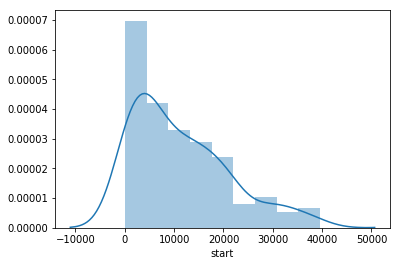

In [30]:
sb.distplot(nophtm_peakcount)

### Import csv with metadata

In [31]:
spreadsheet = pd.read_csv('../output/chip/20171103_s2cell_chip-seq.csv')

#For now we are excluding datasets with no input: 
spreadsheet = spreadsheet[spreadsheet.input != 'no input?']
spreadsheet.head()

,srx,cell_line,geo,paper,strategy,antibody,srr,chromatin,input
0,SRX191907,S2 DRSC: Schneider's line 2,GSM1015404,"['24055367', '24055367']",ChIP-Seq,CP190 antibody (rabbit),SRR580337,0,SRX191915
1,SRX191908,S2 DRSC: Schneider's line 2,GSM1015405,"['24055367', '24055367']",ChIP-Seq,CP190 antibody (rabbit),SRR580338,0,SRX191916
2,SRX191909,S2 DRSC: Schneider's line 2,GSM1015406,"['24055367', '24055367']",ChIP-Seq,Su(Hw) antibody 406 (rabbit),SRR580339,0,SRX191915
3,SRX191910,S2 DRSC: Schneider's line 2,GSM1015407,"['24055367', '24055367']",ChIP-Seq,Su(Hw) antibody 406 (rabbit),SRR580340,0,SRX191916
4,SRX191911,S2 DRSC: Schneider's line 2,GSM1015408,"['24055367', '24055367']",ChIP-Seq,Mod(mdg4)2.2 antibody (rabbit),SRR580341,0,SRX191915


In [32]:
#actually I should probably do this after
all_chromatin = spreadsheet[spreadsheet.chromatin == 1]
no_chromatin = spreadsheet[spreadsheet.chromatin == 0]

In [37]:
chromatin_nophantom = no_phantom[no_phantom.name.isin(all_chromatin.srx.values)]

In [38]:
tf_nophantom = no_phantom[no_phantom.name.isin(no_chromatin.srx.values)]

In [40]:
chr_peakcount = chromatin_nophantom.groupby('name').start.count()

In [41]:
chr_peakcount.describe()

count       37.000000
mean      8845.378378
std       8935.457134
min         27.000000
25%       4871.000000
50%       6310.000000
75%      10022.000000
max      37610.000000
Name: start, dtype: float64

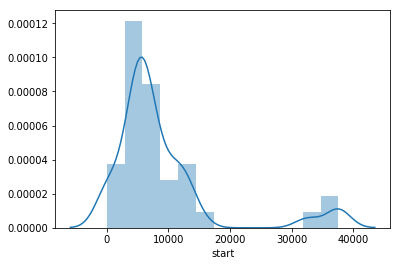

In [42]:
sb.distplot(chr_peakcount)

In [43]:
tf_peakcount = tf_nophantom.groupby('name').start.count()

In [44]:
tf_peakcount.describe()

count      136.000000
mean     11956.477941
std       9920.914531
min         83.000000
25%       2960.000000
50%      11031.500000
75%      19086.750000
max      39564.000000
Name: start, dtype: float64

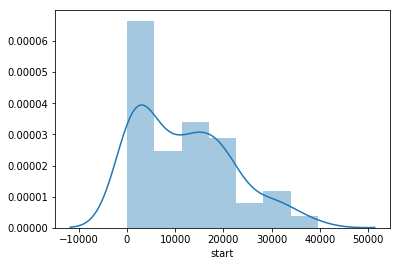

In [45]:
sb.distplot(tf_peakcount)

What happens if we filter for datasets with less than 100 peaks? How many do we lose? 

In [48]:
tf_peakcount[tf_peakcount < 100]

name
ERX402112     83
SRX1389384    92
SRX2055945    91
SRX330270     86
Name: start, dtype: int64

In [49]:
chr_peakcount[chr_peakcount < 100]

name
SRX2055956    83
SRX2417577    27
Name: start, dtype: int64